In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data=pd.read_csv('/content/agricultural_yield.csv')
data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [5]:
X=data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']]
y=data['Yield_kg_per_hectare'].values

In [6]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
model=Sequential([
    Dense(units=64,activation='relu',input_dim=X_train.shape[1]),
    Dense(units=32,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [9]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 142209.7969 - mae: 313.5891 - val_loss: 57061.8984 - val_mae: 191.0574
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52473.8672 - mae: 184.9658 - val_loss: 47407.9062 - val_mae: 172.3009
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45475.6250 - mae: 171.8346 - val_loss: 41744.1797 - val_mae: 161.8401
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41958.3750 - mae: 166.4415 - val_loss: 37783.8867 - val_mae: 154.9480
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37940.8438 - mae: 158.2373 - val_loss: 34259.9844 - val_mae: 146.5659
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35554.4727 - mae: 151.9894 - val_loss: 31417.6875 - val_mae: 141.0550
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32199.9668 - mae: 145.5161 - val_loss: 29680.0781 - val_mae: 138.4631
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30843.2910 - mae: 144.5788 - val_loss

In [10]:
test_loss, test_mae=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2592.7915 - mae: 41.2262 
Test Loss: 2382.247802734375, Test MAE: 39.154396057128906
Test Mean Absolute Error:  39.15


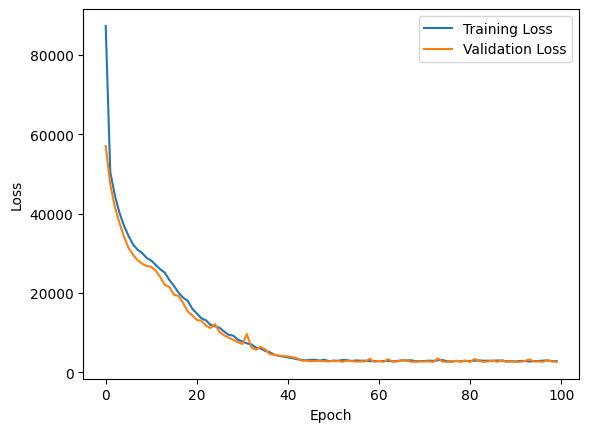

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


<ipython-input-18-1856574021c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-18-1856574021c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


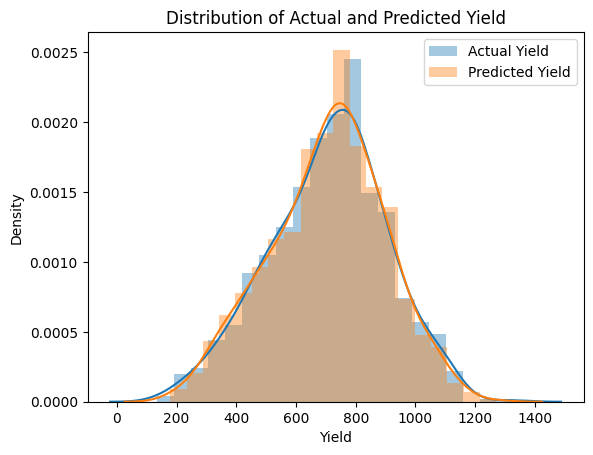

In [18]:
import seaborn as sns
y_pred=model.predict(X_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

In [19]:
predictions=model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[ 437.08255],
       [ 657.5546 ],
       [1073.1869 ],
       [ 667.11786],
       [ 809.2941 ],
       [ 994.27606],
       [ 314.50534],
       [ 595.91364],
       [ 454.58194],
       [ 808.6216 ],
       [ 595.6297 ],
       [ 687.48395],
       [ 634.8059 ],
       [ 744.4331 ],
       [ 849.66315],
       [ 685.99805],
       [ 960.3913 ],
       [ 471.5714 ],
       [ 580.98395],
       [ 365.07965],
       [ 798.47687],
       [ 798.9671 ],
       [ 358.44388],
       [ 820.32544],
       [1009.33795],
       [ 589.5268 ],
       [ 665.5804 ],
       [ 963.7216 ],
       [ 640.57355],
       [ 638.9584 ],
       [ 692.48663],
       [ 809.7135 ],
       [ 827.4937 ],
       [ 791.0508 ],
       [ 473.07526],
       [ 714.1536 ],
       [ 724.88556],
       [1007.83417],
       [ 196.02371],
       [ 658.29083],
       [ 927.1452 ],
       [ 892.7464 ],
       [ 787.16144],
       [ 758.8488 ],
       [ 595.0407 ],
       [ 832.4505 ],
       [ 615.4174 ],
       [ 567.

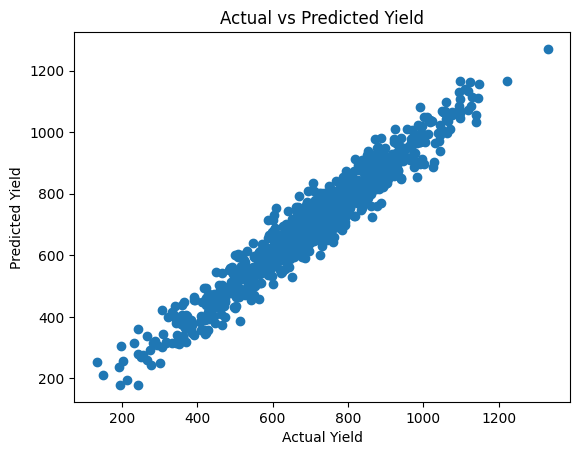

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()